# Dataset Preproprocessing

## Required Libraries

In [ ]:
!pip install -q kagglehub torch torch-geometric scikit-learn matplotlib pandas numpy kagglehub[pandas-datasets] catboost imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import kagglehub

## Download the Dataset

In [ ]:

# Download latest version
path = kagglehub.dataset_download("ellipticco/elliptic-data-set") + '/elliptic_bitcoin_dataset'

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'elliptic-data-set' dataset.
Path to dataset files: /kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset
Path to dataset files: /kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset


In [ ]:
features_df = pd.read_csv(f"{path}/elliptic_txs_features.csv",header=None,index_col=0)
edges_df = pd.read_csv(f"{path}/elliptic_txs_edgelist.csv")
classes_df = pd.read_csv(f"{path}/elliptic_txs_classes.csv")

## Looking at the Datasets

### Features DataFrame

Since the it has no header we should specify `header=None`. We used the first coloumn as the index column which is the transaction id. The next column is the time step. The rest are the features. Features are anonymized and normalized. **There are no edges connecting the different time steps**.

In [ ]:
features_df.head()

,1,2,3,4,5,6,7,8,9,10,...,157,158,159,160,161,162,163,164,165,166
0,,,,,,,,,,,,,,,,,,,,,
230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [ ]:
features_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,157,158,159,160,161,162,163,164,165,166
count,203769.000000,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,...,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05
mean,23.843961,2.454849e-17,-7.531922e-18,2.231681e-17,6.241732e-17,7.653968e-17,5.858162e-17,3.068561e-17,3.570689e-17,4.630738e-17,...,-2.956977e-17,1.673761e-16,-7.225066e-17,7.476130e-17,-4.658634e-17,2.231681e-18,5.244450e-17,1.562177e-17,4.072817e-17,5.913954e-17
std,15.172170,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,1.000000,-1.729826e-01,-2.105526e-01,-1.756361e+00,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,-1.694603e-01,...,-5.770994e-01,-6.262286e-01,-9.790738e-01,-9.785560e-01,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,9.000000,-1.725317e-01,-1.803266e-01,-1.201369e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,-1.690701e-01,...,-5.696264e-01,-5.946915e-01,-9.790738e-01,-9.785560e-01,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,23.000000,-1.692045e-01,-1.328975e-01,4.636092e-01,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,-1.662255e-01,...,-4.799511e-01,-4.559278e-01,2.411283e-01,2.414064e-01,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,38.000000,-1.318553e-01,-5.524241e-02,1.018602e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355932e-01,-1.323665e-01,...,1.552495e-01,1.212026e-01,1.305594e+00,1.398764e+00,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520067e-01,1.199710e-01
max,49.000000,7.168197e+01,7.359505e+01,2.683580e+00,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,7.231840e+01,...,7.862953e+00,7.914041e+00,1.461330e+00,1.461369e+00,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


### Edges DataFrame

This one is simple enough. Each row represents an edge from `txId1` to `txId2`.

In [ ]:
edges_df.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [ ]:
edges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234355 entries, 0 to 234354
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId1   234355 non-null  int64
 1   txId2   234355 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB


### Classes DataFrame

If we look at the classes dataframe, we can see that there are three classes: unknown, 1 for illicit and 2 for licit transactions.

In [ ]:
classes_df.head(10)

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
5,230459870,unknown
6,230333930,unknown
7,230595899,unknown
8,232013274,unknown
9,232029206,2


#### Inspecting the Classes

In [ ]:
classes_df['class'].value_counts()

,count
class,
unknown,157205
2,42019
1,4545


## Removing Unknown Classes From Datasets

We will only consider the illicit and licit classes and ignore the unknown ones. Therefore, we will map class 2 to 0 and class 1 to 1.

### Creating Labeled Classes DataFrame

In [ ]:
labeled_classed_df =  classes_df[classes_df['class']!='unknown']
labeled_classed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46564 entries, 3 to 203766
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   txId    46564 non-null  int64 
 1   class   46564 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
labeled_classed_df.head()

,txId,class
3,232438397,2
9,232029206,2
10,232344069,2
11,27553029,2
16,3881097,2


### Remove Edges With Unknown Nodes

After removing unknown nodes from classes, we should also remove edges that are connected to those nodes.
Now there are 36624 edges remaining.

In [ ]:
labeled_edges_df = edges_df[edges_df['txId1'].isin(labeled_classed_df['txId']) & edges_df['txId2'].isin(labeled_classed_df['txId'])]
labeled_edges_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36624 entries, 5 to 234350
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   txId1   36624 non-null  int64
 1   txId2   36624 non-null  int64
dtypes: int64(2)
memory usage: 858.4 KB


In [ ]:
labeled_edges_df.head(5)

,txId1,txId2
5,232344069,27553029
8,3881097,232457116
15,232051089,232470704
26,230473487,7089694
33,231182296,14660781


### Labeled Features

In [ ]:
labeled_features = features_df.loc[labeled_classed_df['txId']]
labeled_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46564 entries, 232438397 to 158375402
Columns: 166 entries, 1 to 166
dtypes: float64(165), int64(1)
memory usage: 59.3 MB


### Change Class Type to 0 for licit and 1 for illicit

In [ ]:
labeled_classed_df["class"] = (
    labeled_classed_df["class"]
    .map({'2': 0, '1': 1})
    .astype("int64")
)

/tmp/ipython-input-2414027884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_classed_df["class"] = (


In [ ]:
labeled_classed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46564 entries, 3 to 203766
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   txId    46564 non-null  int64
 1   class   46564 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB


## Representing the Data as a Graph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

### Create NetworkX Graph

In [ ]:
G = nx.from_pandas_edgelist(
    labeled_edges_df, 'txId1', 'txId2', create_using=nx.DiGraph)


class_mapping = labeled_classed_df.set_index('txId')['class'].to_dict()

nodes_to_remove = [node for node in G.nodes() if node not in class_mapping]
G.remove_nodes_from(nodes_to_remove)

nx.set_node_attributes(G, class_mapping, 'class')

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of nodes in the graph: 35874
Number of edges in the graph: 36624


### Visualize Overall Degree Distribution

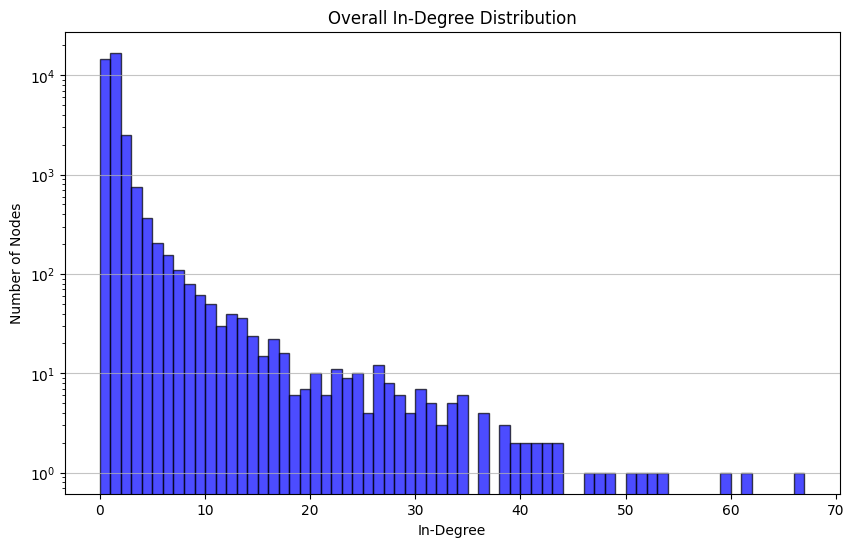

In [ ]:
in_degrees = [G.in_degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=range(max(in_degrees) + 2),
         alpha=0.7, color='blue', edgecolor='black')
plt.title('Overall In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Number of Nodes')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Compare Degree Distributions for Licit and Illicit Nodes

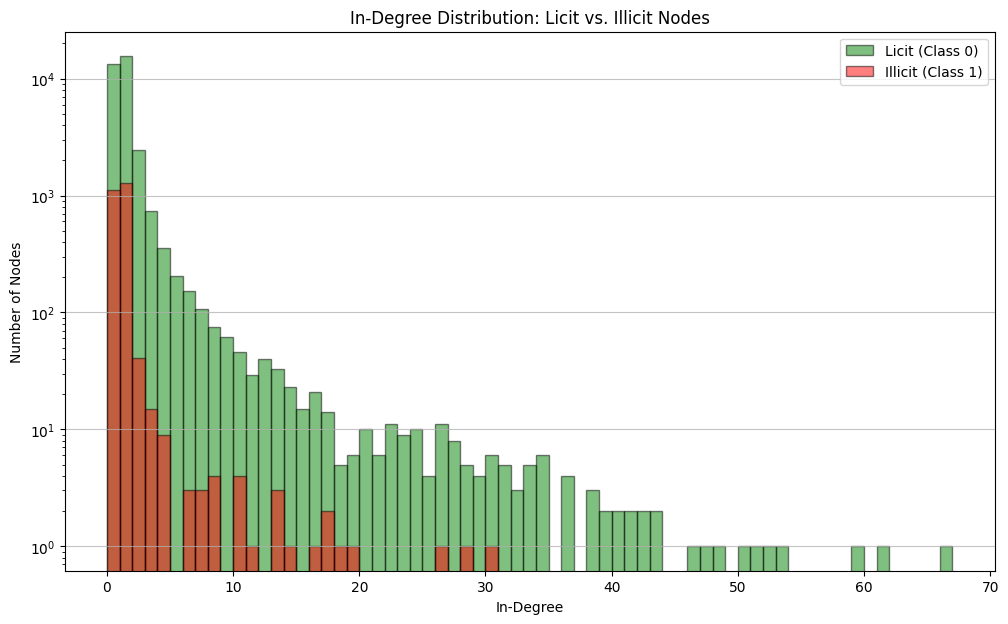

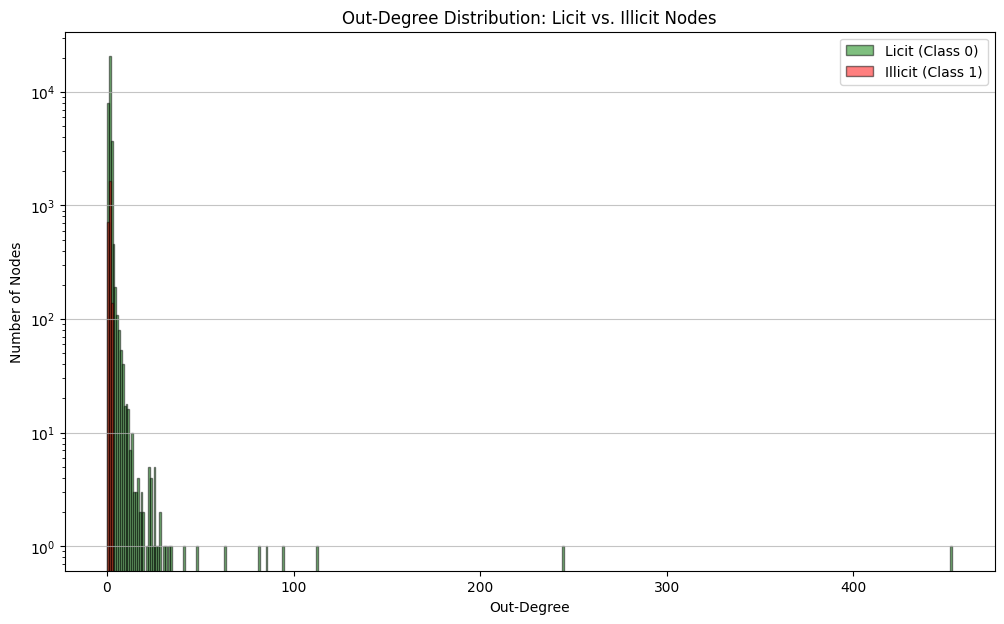

In [ ]:
licit_nodes = [n for n, data in G.nodes(data=True) if data.get('class') == 0]
illicit_nodes = [n for n, data in G.nodes(data=True) if data.get('class') == 1]

licit_in_degrees = [G.in_degree(n) for n in licit_nodes]
illicit_in_degrees = [G.in_degree(n) for n in illicit_nodes]

plt.figure(figsize=(12, 7))
plt.hist(licit_in_degrees, bins=range(max(in_degrees) + 2), alpha=0.5,
         label='Licit (Class 0)', color='green', edgecolor='black')
plt.hist(illicit_in_degrees, bins=range(max(in_degrees) + 2), alpha=0.5,
         label='Illicit (Class 1)', color='red', edgecolor='black')
plt.title('In-Degree Distribution: Licit vs. Illicit Nodes')
plt.xlabel('In-Degree')
plt.ylabel('Number of Nodes')
plt.yscale('log')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

out_degrees = [G.out_degree(n) for n in G.nodes()]
licit_out_degrees = [G.out_degree(n) for n in licit_nodes]
illicit_out_degrees = [G.out_degree(n) for n in illicit_nodes]

plt.figure(figsize=(12, 7))
plt.hist(licit_out_degrees, bins=range(max(out_degrees) + 2), alpha=0.5,
         label='Licit (Class 0)', color='green', edgecolor='black')
plt.hist(illicit_out_degrees, bins=range(max(out_degrees) + 2),
         alpha=0.5, label='Illicit (Class 1)', color='red', edgecolor='black')
plt.title('Out-Degree Distribution: Licit vs. Illicit Nodes')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Nodes')
plt.yscale('log')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Model

## Prepare

#### Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

#### Setting The Device

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


#### Setting The Seed

In [ ]:
SEED = 42
torch.manual_seed(SEED)
if device.type == "cuda":
    torch.cuda.manual_seed(SEED)

## SGAT

### GAT Conv

In [ ]:
class GATBranch(nn.Module):
    def __init__(self, in_dim=64, out_dim=64, num_heads=8, dropout=0.0):
        super().__init__()
        self.gat = GATConv(
            in_channels=in_dim,
            out_channels=out_dim,
            heads=num_heads,
            concat=True,      # important
            dropout=dropout
        )
        self.proj = nn.Linear(num_heads * out_dim, out_dim)

    def forward(self, x, edge_index):
        x = self.gat(x, edge_index)     # (N, heads * 64)
        x = self.proj(x)                # (N, 64)
        return x

### STA

In [ ]:


class STA(nn.Module):
    def __init__(self, in_dim, out_dim, K_hops=2, eps=1e-8):
        super().__init__()

        self.K_hops = K_hops
        self.eps = eps

        # Linear projections
        self.W_Q = nn.Linear(in_dim, out_dim, bias=False)
        self.W_K = nn.Linear(in_dim, out_dim, bias=False)
        self.W_V = nn.Linear(in_dim, out_dim, bias=False)

        # Linear attention feature map φ
        self.phi = lambda x: torch.relu(x) + 1

        # hop weights β_k
        self.beta = nn.Parameter(torch.ones(K_hops + 1))

    def propagate(self, x, edge_index):
        """
        Simple message passing: sum aggregation
        """
        row, col = edge_index  # col -> row
        out = torch.zeros_like(x)
        # index_add_ sums x[col] into out[row]
        out.index_add_(0, row, x[col])
        return out

    def forward(self, h, edge_index):
        """
        h: [N, in_dim]
        edge_index: [2, E]
        """

        # ---- 1. Q K V ----
        Q = self.phi(self.W_Q(h))   # [N, d]
        K = self.phi(self.W_K(h))   # [N, d]
        V = self.W_V(h)             # [N, d]

        # ---- 2. initial messages (k=0) ----
        # scalar per node
        KV = (K * V)                # [N, d]
        Z = K                      # [N, d]

        outputs = []

        M_k = KV
        Z_k = Z

        # ---- 3. subtree attention for each hop ----
        for k in range(self.K_hops + 1):

            # attention (element-wise)
            out_k = (Q * M_k) / (Q * Z_k + self.eps)
            outputs.append(self.beta[k] * out_k)

            # propagate for next hop (except last)
            if k < self.K_hops:
                M_k = self.propagate(M_k, edge_index)
                Z_k = self.propagate(Z_k, edge_index)

        # ---- 4. aggregate all hops ----
        out = torch.stack(outputs, dim=0).sum(dim=0)  # [N, d]

        return out

### SGAT

In [ ]:
class SGAT(nn.Module):
    def __init__(self, num_heads=4, gamma=0.6,K_hops=4):
        super().__init__()
        self.gamma = gamma

        # encoder
        self.encoder =  nn.Sequential(
            nn.Linear(165, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        # branches
        self.gat = GATBranch(num_heads=num_heads)
        self.sta = STA(in_dim=64, out_dim=64, K_hops=K_hops)

        # classifiers
        self.gat_classifier = nn.Linear(64, 2)
        self.main_classifier = nn.Linear(64, 2)

    def forward(self, x, edge_index):
        """
        x: (N, 165)
        edge_index: (2, E)
        """
        # shared embedding
        Z = self.encoder(x)             # (N, 64)

        # GAT branch
        O_GAT = self.gat(Z, edge_index)  # (N, 64)
        logits_gat = self.gat_classifier(O_GAT)  # (N, 2)

        # STA branch
        O_STA = self.sta(Z, edge_index)             # (N, 64)

        # fusion
        O_final = O_GAT * O_STA         # element-wise ⊙

        logits_main = self.main_classifier(O_final)  # (N, 2)

        return logits_main, logits_gat

# Train

## Build Graph Of Time Step $t$

In [ ]:
import math


def build_graph_full(labeled_features, labeled_edges_df, labeled_classed_df):
    # Drop time column
    features = labeled_features.iloc[:, 1:]

    tx_ids = features.index.values
    txid_to_idx = {txid: i for i, txid in enumerate(tx_ids)}
    N = len(tx_ids)

    # Node features
    X = torch.tensor(features.values, dtype=torch.float32)  # (N, d)

    # Labels: 0 = licit, 1 = illicit, -1 = unknown
    labels = torch.full((N,), -1, dtype=torch.long)
    class_map = dict(zip(labeled_classed_df.txId, labeled_classed_df["class"]))
    for txid, idx in txid_to_idx.items():
        if txid in class_map:
            labels[idx] = int(class_map[txid])

    # Build edge_index (COO)
    edges = []
    for _, row in labeled_edges_df.iterrows():
        if row.txId1 in txid_to_idx and row.txId2 in txid_to_idx:
            i = txid_to_idx[row.txId1]
            j = txid_to_idx[row.txId2]
            edges.append([i, j])
            edges.append([j, i])  # undirected

    edge_index = torch.tensor(
        edges, dtype=torch.long).t().contiguous()  # (2, E)
    return X, edge_index, labels

## Sampling

In [ ]:


def sample_graph_sets(labels, train_size, val_size, test_size, illicit_ratio=0.2):


    labeled_idx = (labels != -1).nonzero(as_tuple=True)[0]
    y = labels[labeled_idx]

    illicit_pool = labeled_idx[y == 1]
    licit_pool = labeled_idx[y == 0]

    illicit_pool = illicit_pool[torch.randperm(illicit_pool.numel())]
    licit_pool = licit_pool[torch.randperm(licit_pool.numel())]

    def sample_set(n_total, ratio):
        nonlocal illicit_pool, licit_pool
        n_illicit = math.ceil(n_total * ratio)
        n_licit = n_total - n_illicit
        if illicit_pool.numel() < n_illicit or licit_pool.numel() < n_licit:
            raise ValueError("Not enough nodes to satisfy requested ratio/size.")
        s_illicit = illicit_pool[:n_illicit]
        s_licit = licit_pool[:n_licit]
        # Update poolsor (N,1)
        illicit_pool = illicit_pool[n_illicit:]
        licit_pool = licit_pool[n_licit:]
        return torch.cat([s_illicit, s_licit])

    train_idx = sample_set(train_size, illicit_ratio)
    val_idx   = sample_set(val_size, illicit_ratio)
    test_idx  = sample_set(test_size, illicit_ratio)

    N = labels.size(0)
    train_mask = torch.zeros(N, dtype=torch.bool)
    val_mask   = torch.zeros(N, dtype=torch.bool)
    test_mask  = torch.zeros(N, dtype=torch.bool)

    train_mask[train_idx] = True
    val_mask[val_idx]     = True
    test_mask[test_idx]   = True

    return train_mask, val_mask, test_mask

## Check if illicit ratio below a threshold

In [ ]:
def count_licit_illicit(labels:torch.Tensor):
    num_illicit = labels[labels == 1].numel()
    num_licit = labels[labels == 0].numel()
    return num_licit, num_illicit

def is_below_treshold(ratio, train_ratio, min_illicit_ratio):
    threshold = min_illicit_ratio * (1 - train_ratio) * 2
    if ratio < threshold:
        return True
    else:
        return False

## Train setup

In [ ]:
EPOCHS = 50
GAMMA = 0.6
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.1
MIN_ILLICIT_RATIO = 0.2
NUM_HEADS = 8
LEARNING_RATE = 0.001
WEIGHT_DECAY = 1e-3
K_HOPS = 3

## Training Loop

In [ ]:
def train_one_timestep(
    X : torch.Tensor ,
    edge_index :torch.Tensor,
    labels: torch.Tensor,
    train_mask: torch.Tensor,
    val_mask: torch.Tensor,
    test_mask: torch.Tensor,
    EPOCHS=EPOCHS,
    gamma=GAMMA,
    K_hops=K_HOPS,
)-> dict:

    model = SGAT(num_heads=NUM_HEADS, gamma=gamma, K_hops=K_hops)

    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=0.001,
        weight_decay=1e-3,
    )

    # class imbalance handling
    num_pos = (labels[train_mask] == 1).sum()
    num_neg = (labels[train_mask] == 0).sum()

    class_weights = torch.tensor(
        [1.0, num_neg / num_pos],
        dtype=torch.float32
    )

    criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

    best_val = None
    best_state = model.state_dict()

    for epoch in range(EPOCHS):
        model.train()
        optimizer.zero_grad()

        logits_main, logits_gat = model(X, edge_index)

        loss_main = criterion(
            logits_main[train_mask],
            labels[train_mask]
        )
        loss_gat = criterion(
            logits_gat[train_mask],
            labels[train_mask]
        )

        loss = (1 - gamma) * loss_main + gamma * loss_gat
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            preds = logits_main[val_mask].argmax(dim=1)

            val_acc = (preds == labels[val_mask]).float().mean()

            val_pos_acc = (
                preds[labels[val_mask] == 1] == 1
            ).float().mean()

            val_neg_acc = (
                preds[labels[val_mask] == 0] == 0
            ).float().mean()

            if best_val is None or val_acc > best_val:
                best_val = val_acc
                best_state = model.state_dict()

        print(
            f"Epoch {epoch:03d} | "
            f"Loss: {loss.item():.4f} | "
            f"Val Acc: {val_acc.item():.4f} | "
            f"Val Pos Acc: {val_pos_acc.item():.4f} | "
            f"Val Neg Acc: {val_neg_acc.item():.4f}"
        )

    # Test
    model.load_state_dict(best_state)
    model.eval()

    with torch.no_grad():
        logits_main, _ = model(X, edge_index)
        preds = logits_main[test_mask].argmax(dim=1)

        test_acc = (preds == labels[test_mask]).float().mean()
        test_pos_acc = (
            preds[labels[test_mask] == 1] == 1
        ).float().mean()
        test_neg_acc = (
            preds[labels[test_mask] == 0] == 0
        ).float().mean()

    return {
        "val_acc": best_val.item(),
        "test_acc": test_acc.item(),
        "test_pos_acc": test_pos_acc.item(),
        "test_neg_acc": test_neg_acc.item(),
        "model": model,
    }

## Train for $k$ models.

In [ ]:

results = []
unused_timesteps = []
k = 10
for t in range(1, k):
    print(f"\nTraining timestep {t}")
    X, edge_index, labels = build_graph_full(
        labeled_features,
        labeled_edges_df,
        labeled_classed_df,
    )
    num_licit, num_illicit = count_licit_illicit(labels)
    if is_below_treshold(num_illicit / (num_illicit + num_licit), train_ratio=0.8, min_illicit_ratio=0.05,):
        print(f"Skipping timestep {t} due to low illicit ratio")
        unused_timesteps.append(
            {
                "time_step": t,
                "X": X,
                "edge_index" : edge_index,
                "labels": labels ,
                "num_licit": num_licit,
                "num_illicit": num_illicit,
            }
        )
        continue

    train_mask, val_mask, test_mask = sample_graph_sets(
            labels, int(TRAIN_RATIO*5000), int(VALIDATION_RATIO*5000), int((1-TRAIN_RATIO-VALIDATION_RATIO)*5000),MIN_ILLICIT_RATIO)
    result = train_one_timestep(
        X,
        edge_index,
        labels,
        train_mask,
        val_mask,
        test_mask,
        EPOCHS=EPOCHS,
    )
    result["model"].eval()
    with torch.no_grad():
        logits_main, _ = result["model"](X, edge_index)
        probs = torch.softmax(logits_main, dim=1)
        result["preds"] = probs[:, 1].cpu()

    result["X"] = X
    result["train_mask"] = train_mask
    result["val_mask"] = val_mask
    result["test_mask"] = test_mask
    result["labels"] = labels
    result["time_step"] = t
    result["num_licit"] = num_licit
    result["num_illicit"] = num_illicit
    results.append(result)


Training timestep 1
Epoch 000 | Loss: 0.7091 | Val Acc: 0.3020 | Val Pos Acc: 0.4200 | Val Neg Acc: 0.2725
Epoch 000 | Loss: 0.7091 | Val Acc: 0.3020 | Val Pos Acc: 0.4200 | Val Neg Acc: 0.2725
Epoch 001 | Loss: 0.6745 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 001 | Loss: 0.6745 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 002 | Loss: 0.6582 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 002 | Loss: 0.6582 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 003 | Loss: 0.6405 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 003 | Loss: 0.6405 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 004 | Loss: 0.6205 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 004 | Loss: 0.6205 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 005 | Loss: 0.5998 | Val Acc: 0.8000 | Val Pos Acc: 0.0000 | Val Neg Acc: 1.0000
Epoch 005 | Loss: 0.59

## Meta Model

In [ ]:
def build_meta_dataset(models):
    """
    models: list of dicts
        each dict must contain:
            - "preds": Tensor (N,)
            - "labels": Tensor (N,)
            - "train_mask", "val_mask", "test_mask": Bool Tensor (N,)

    returns:
        X_train, y_train
        X_val, y_val
        X_test, y_test
    """

    n_models = len(models)

    # ---- Sanity: assume shared node space
    labels = models[0]["labels"].detach().cpu().numpy()
    train_mask = models[0]["train_mask"].cpu().numpy().astype(bool)
    val_mask = models[0]["val_mask"].cpu().numpy().astype(bool)
    test_mask = models[0]["test_mask"].cpu().numpy().astype(bool)

    N = labels.shape[0]

    # ---- Meta-features: (N, n_models)
    X_meta = np.zeros((N, n_models), dtype=np.float32)

    for j, m in enumerate(models):
        preds = m["preds"].detach().cpu().numpy().reshape(-1)
        X_meta[:, j] = preds

    # ---- Split by global masks
    X_train = X_meta[train_mask]
    y_train = labels[train_mask]

    X_val = X_meta[val_mask]
    y_val = labels[val_mask]

    X_test = X_meta[test_mask]
    y_test = labels[test_mask]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = build_meta_dataset(results)

In [ ]:
from catboost import CatBoostClassifier

meta_model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.001,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    random_seed=SEED,
    verbose=200
)

meta_model.fit(
    X_train,
    y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

0:	test: 0.9651500	best: 0.9651500 (0)	total: 49.9ms	remaining: 1m 39s
200:	test: 0.9794500	best: 0.9819500 (6)	total: 664ms	remaining: 5.94s
200:	test: 0.9794500	best: 0.9819500 (6)	total: 664ms	remaining: 5.94s
400:	test: 0.9795250	best: 0.9819500 (6)	total: 1.41s	remaining: 5.62s
400:	test: 0.9795250	best: 0.9819500 (6)	total: 1.41s	remaining: 5.62s
600:	test: 0.9786750	best: 0.9819500 (6)	total: 3.02s	remaining: 7.02s
600:	test: 0.9786750	best: 0.9819500 (6)	total: 3.02s	remaining: 7.02s
800:	test: 0.9784750	best: 0.9819500 (6)	total: 3.74s	remaining: 5.6s
800:	test: 0.9784750	best: 0.9819500 (6)	total: 3.74s	remaining: 5.6s
1000:	test: 0.9792500	best: 0.9819500 (6)	total: 4.36s	remaining: 4.35s
1000:	test: 0.9792500	best: 0.9819500 (6)	total: 4.36s	remaining: 4.35s
1200:	test: 0.9800250	best: 0.9819500 (6)	total: 4.96s	remaining: 3.3s
1200:	test: 0.9800250	best: 0.9819500 (6)	total: 4.96s	remaining: 3.3s
1400:	test: 0.9804000	best: 0.9819500 (6)	total: 5.58s	remaining: 2.38s
1400:

In [ ]:
test_probs = meta_model.predict_proba(X_test)[:, 1]
test_preds = (test_probs > 0.5).astype(int)

# Results and Metrics

In [ ]:
for result in results:
    print(
        f"Time Step {result['time_step']}: "
        f"Test Acc: {result['test_acc']:.4f}, "
        f"Test Pos Acc: {result['test_pos_acc']:.4f}, "
        f"Test Neg Acc: {result['test_neg_acc']:.4f}, "
        f"Num Licit: {result['num_licit']}, "
        f"Num Illicit: {result['num_illicit']} "
    )

Time Step 1: Test Acc: 0.9339, Test Pos Acc: 0.8700, Test Neg Acc: 0.9499, Num Licit: 42019, Num Illicit: 4545 
Time Step 2: Test Acc: 0.9459, Test Pos Acc: 0.8700, Test Neg Acc: 0.9649, Num Licit: 42019, Num Illicit: 4545 
Time Step 3: Test Acc: 0.9439, Test Pos Acc: 0.9300, Test Neg Acc: 0.9474, Num Licit: 42019, Num Illicit: 4545 
Time Step 4: Test Acc: 0.9439, Test Pos Acc: 0.9100, Test Neg Acc: 0.9524, Num Licit: 42019, Num Illicit: 4545 
Time Step 5: Test Acc: 0.9499, Test Pos Acc: 0.8900, Test Neg Acc: 0.9649, Num Licit: 42019, Num Illicit: 4545 
Time Step 6: Test Acc: 0.9339, Test Pos Acc: 0.8700, Test Neg Acc: 0.9499, Num Licit: 42019, Num Illicit: 4545 
Time Step 7: Test Acc: 0.9359, Test Pos Acc: 0.8900, Test Neg Acc: 0.9474, Num Licit: 42019, Num Illicit: 4545 
Time Step 8: Test Acc: 0.9499, Test Pos Acc: 0.8900, Test Neg Acc: 0.9649, Num Licit: 42019, Num Illicit: 4545 
Time Step 9: Test Acc: 0.9459, Test Pos Acc: 0.8800, Test Neg Acc: 0.9624, Num Licit: 42019, Num Illicit

In [ ]:
avg_test_acc = np.mean([r['test_acc'] for r in results])
avg_test_pos_acc = np.mean([r['test_pos_acc'] for r in results])
avg_test_neg_acc = np.mean([r['test_neg_acc'] for r in results])
print(f"\nAverage Test Acc: {avg_test_acc:.4f}")
print(f"Average Test Pos Acc: {avg_test_pos_acc:.4f}")
print(f"Average Test Neg Acc: {avg_test_neg_acc:.4f}")



Average Test Acc: 0.9426
Average Test Pos Acc: 0.8889
Average Test Neg Acc: 0.9560


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix
from imblearn.metrics import geometric_mean_score

auc = roc_auc_score(y_test, test_probs)
f1 = f1_score(y_test, test_preds)
rec = recall_score(y_test, test_preds)
gmean = geometric_mean_score(y_test, test_preds)

print(f"AUC   : {auc:.4f}")
print(f"F1    : {f1:.4f}")
print(f"Recall: {rec:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(confusion_matrix(y_test, test_preds))

AUC   : 0.9863
F1    : 0.8585
Recall: 0.9100
G-Mean: 0.9285
[[378  21]
 [  9  91]]


In [ ]:
metrics_data = []
for result in results:
    metrics_data.append({
        'Time Step': result['time_step'],
        'Test Acc': result['test_acc'],
        'Test Pos Acc': result['test_pos_acc'],
        'Test Neg Acc': result['test_neg_acc'],
        'Num Licit': result['num_licit'],
        'Num Illicit': result['num_illicit']
    })

metrics_df = pd.DataFrame(metrics_data)
print("DataFrame 'metrics_df' created successfully.")
metrics_df.head()

DataFrame 'metrics_df' created successfully.


,Time Step,Test Acc,Test Pos Acc,Test Neg Acc,Num Licit,Num Illicit
0,1,0.933868,0.87,0.949875,42019,4545
1,2,0.945892,0.87,0.964912,42019,4545
2,3,0.943888,0.93,0.947368,42019,4545
3,4,0.943888,0.91,0.952381,42019,4545
4,5,0.949900,0.89,0.964912,42019,4545


In [ ]:
print(metrics_df.to_markdown(index=False))

|   Time Step |   Test Acc |   Test Pos Acc |   Test Neg Acc |   Num Licit |   Num Illicit |
|------------:|-----------:|---------------:|---------------:|------------:|--------------:|
|           1 |   0.933868 |           0.87 |       0.949875 |       42019 |          4545 |
|           2 |   0.945892 |           0.87 |       0.964912 |       42019 |          4545 |
|           3 |   0.943888 |           0.93 |       0.947368 |       42019 |          4545 |
|           4 |   0.943888 |           0.91 |       0.952381 |       42019 |          4545 |
|           5 |   0.9499   |           0.89 |       0.964912 |       42019 |          4545 |
|           6 |   0.933868 |           0.87 |       0.949875 |       42019 |          4545 |
|           7 |   0.935872 |           0.89 |       0.947368 |       42019 |          4545 |
|           8 |   0.9499   |           0.89 |       0.964912 |       42019 |          4545 |
|           9 |   0.945892 |           0.88 |       0.962406 |       4

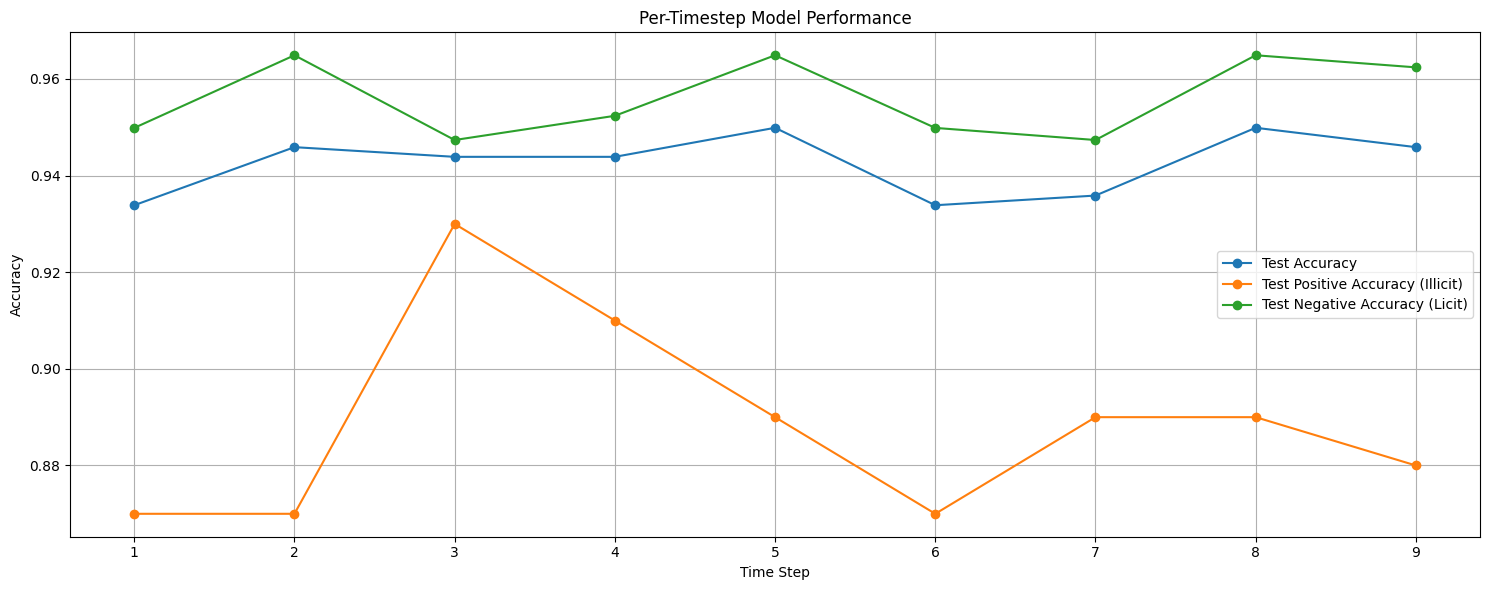

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(metrics_df['Time Step'], metrics_df['Test Acc'],
         marker='o', label='Test Accuracy')
plt.plot(metrics_df['Time Step'], metrics_df['Test Pos Acc'],
         marker='o', label='Test Positive Accuracy (Illicit)')
plt.plot(metrics_df['Time Step'], metrics_df['Test Neg Acc'],
         marker='o', label='Test Negative Accuracy (Licit)')
plt.title('Per-Timestep Model Performance')
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# plt.figure(figsize=(15, 6))
# plt.plot(metrics_df['Time Step'], metrics_df['Num Illicit'],
#          marker='o', label='Number of Illicit Transactions')
# plt.plot(metrics_df['Time Step'], metrics_df['Num Licit'],
#          marker='o', label='Number of Licit Transactions')
# plt.title('Number of Licit and Illicit Transactions per Time Step')
# plt.xlabel('Time Step')
# plt.ylabel('Number of Transactions')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

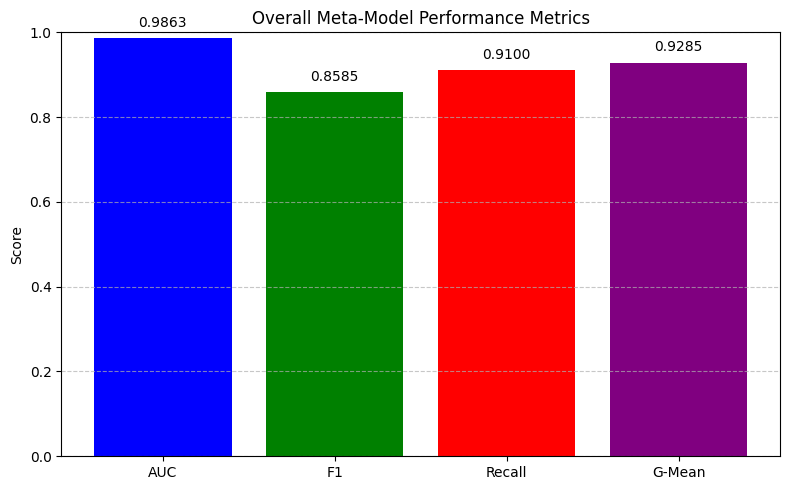

In [ ]:
metrics = ['AUC', 'F1', 'Recall', 'G-Mean']
values = [auc, f1, rec, gmean]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Metrics are typically between 0 and 1
plt.title('Overall Meta-Model Performance Metrics')
plt.ylabel('Score')

for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()